In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

from importlib.machinery import SourceFileLoader
u=SourceFileLoader('u','/home/marco/work/tesi/BEGepro/scripts/utils.py').load_module()

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca

import peakutils as pu
from scipy.signal import savgol_filter

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()

In [3]:
coll1=coll.subset('ae',0,1.6e-2)
#coll1=coll.subset('energy',2102,2106)
curr1=coll1.get_curr()
trace1=coll.get_traces()
coll2=coll.subset('ae',1.6e-2)
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


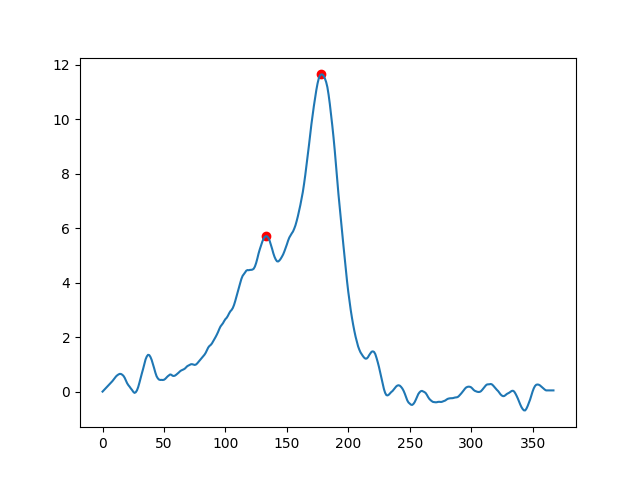

n peaks computed 2


<IPython.core.display.Javascript object>


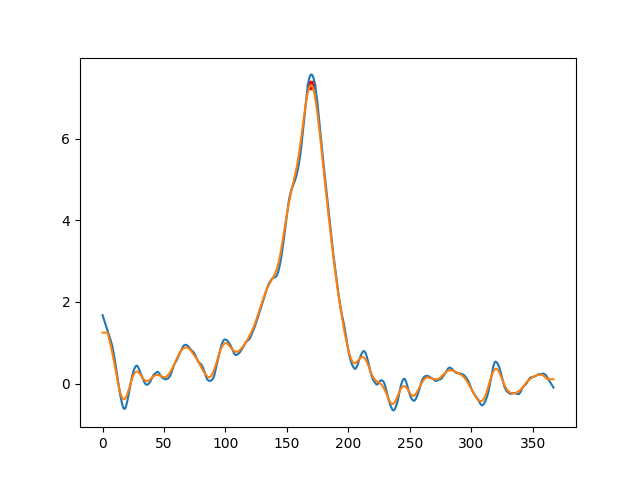

n peaks computed 1


In [4]:
#MSE
plt.figure()
i=23
plt.plot(curr1[i])

#reproducing what the peak finder does
indexes=u.n_peaks().compute_n_peaks(curr1[i])
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,curr1[i][indexes],marker='o',color='r')

#SSE
plt.figure()
plt.plot(curr2[i])
f=savgol_filter(curr2[i],10,0)
plt.plot(f)
indexes=u.n_peaks().compute_n_peaks(curr2[i])
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,f[indexes],marker='o',color='r')

<IPython.core.display.Javascript object>


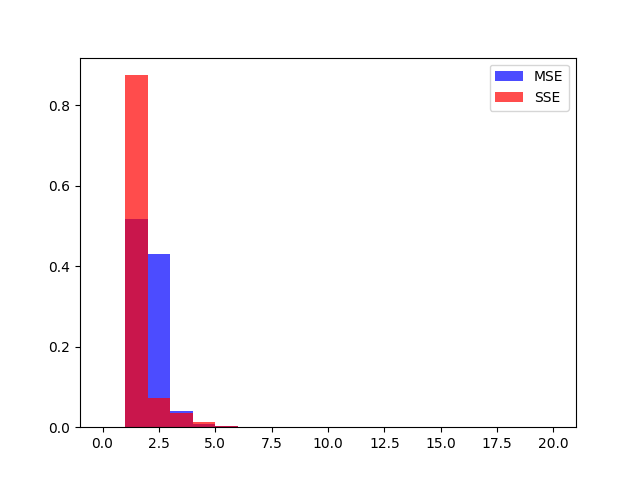

<IPython.core.display.Javascript object>


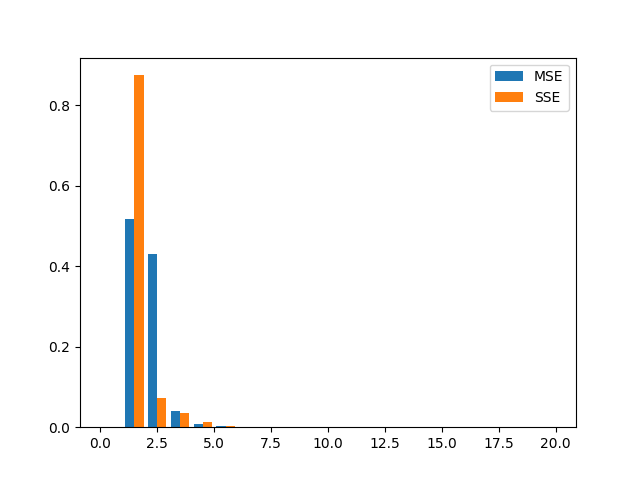

<IPython.core.display.Javascript object>


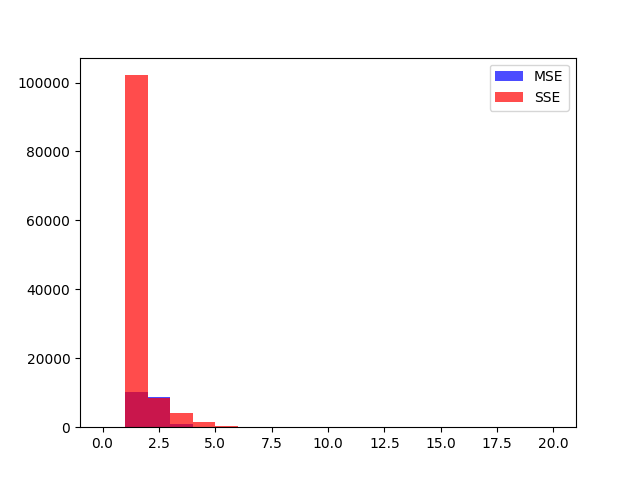

In [5]:
#Distribution of the events
n1=coll1.get_n_peaks()
n2=coll2.get_n_peaks()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE')
plt.hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE')
plt.legend()

#Same plot 
plt.figure()
plt.hist([n1,n2],bins=bins,density=True,label=['MSE','SSE'])
plt.legend()

#without normalization

n1=coll1.get_n_peaks()
n2=coll2.get_n_peaks()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE')
plt.legend()

<IPython.core.display.Javascript object>


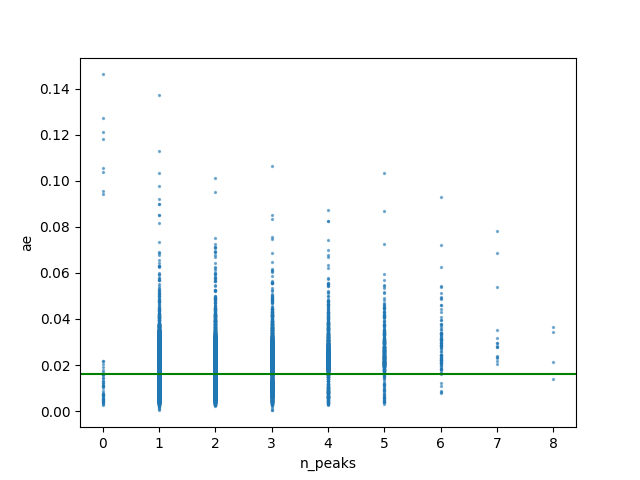

Text(21, 0.018, 'cut_ae')

In [6]:
#Scatter plot
plt.figure()
plt.scatter(coll.get_n_peaks(),coll.get_avse(),s=2,alpha=0.5)
plt.show()

plt.axhline(1.6e-2, color='g')
plt.xlabel('n_peaks')
plt.ylabel('ae')

plt.annotate('cut_ae',(21,1.8e-2))

8.72e-07
(66, 284)


<IPython.core.display.Javascript object>


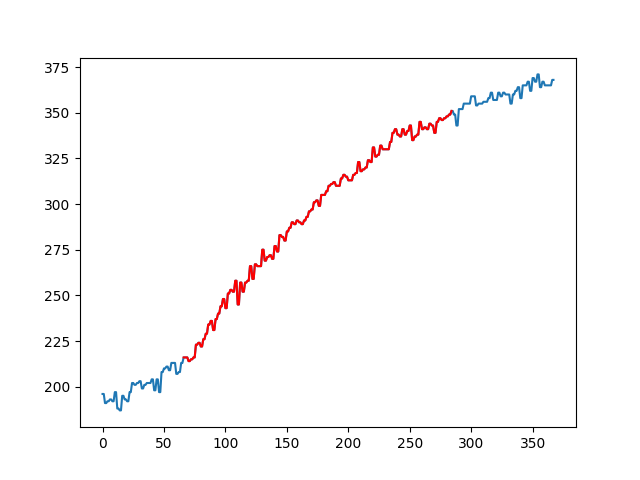

<IPython.core.display.Javascript object>


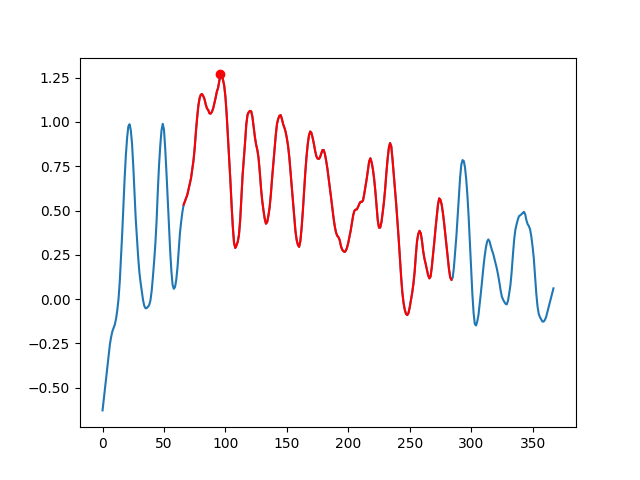

In [7]:
i=3306 #low energy
i=73
i=1
i=77 #SSE o MSE?
i=120 #MSE con due picchi di altezza simile
i=137 # se tolgo threshold vede 3 picchi se no 0
i=22 # flat MSE
i=37 #MSE o SSE
i=3306
curr=coll.get_curr()[i]
trace=coll.get_traces()[i]

obj= u.rise_time()
rt,t=obj.compute_rt(trace,4e-9)
print(rt)
print(t)

x=np.arange(0,len(trace))

plt1=plt.figure()
plt.plot(trace)
plt.plot(x[t[0] : t[1]+1],trace[t[0] : t[1]+1],color='r')
plt.show()

plt.figure()
plt.plot(curr)
plt.plot(x[t[0] : t[1]+1],curr[t[0] : t[1]+1],color='r')
plt.show()

In [8]:
ind=u.n_peaks().compute_n_peaks2(curr,t)
print(ind)
plt.scatter(ind,curr[ind],marker='o',color='r')

[96]


<IPython.core.display.Javascript object>


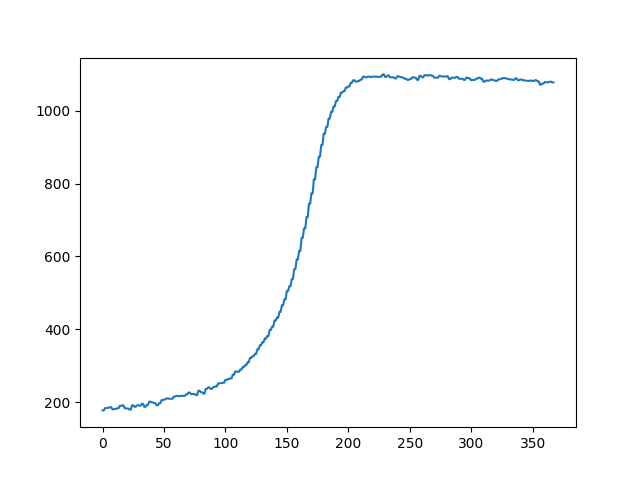

<IPython.core.display.Javascript object>


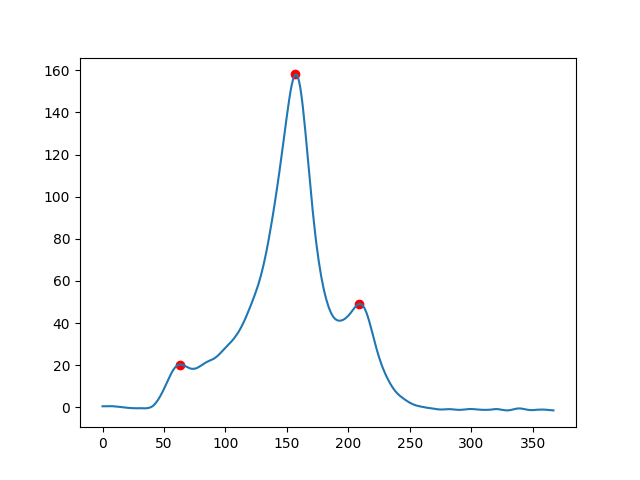

0.015465956763589908
2
[ 63 157 209]
(106, 186)


In [9]:
#MSE
coll1=coll.subset('ae',0,1.6e-2)
coll1=coll.subset('energy',2102,2106)
curr1=coll1.get_curr()
trace1=coll.get_traces()
coll2=coll.subset('ae',1.6e-2)
curr2=coll2.get_curr()

i=23

plt.figure()
plt.plot(trace1[i])

plt.figure()
plt.plot(curr1[i])

from scipy.signal import find_peaks
rt,t=u.rise_time().compute_rt(trace1[i],4e-9)
print(coll1.get_avse()[i])
print(coll1.get_n_peaks()[i])
ind=find_peaks(curr1[i],prominence=0.50,height=0.25*max(curr),distance=30)[0]
print(ind)
plt.scatter(ind,curr1[i][ind],color='r')
print(t)
#[t[0]:t[1]+1]

0.052232100460957415


<IPython.core.display.Javascript object>


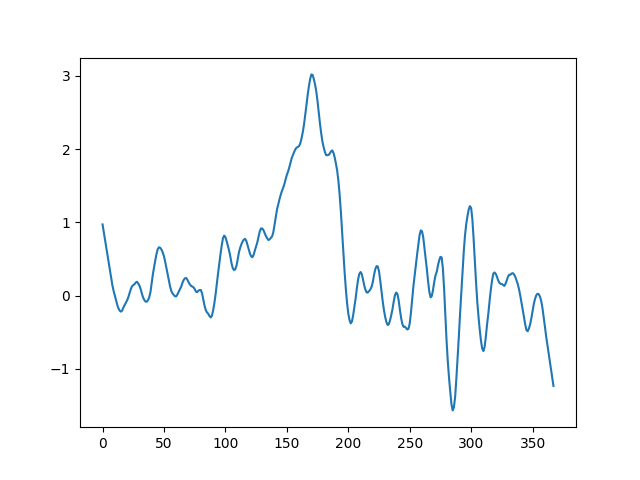

<IPython.core.display.Javascript object>


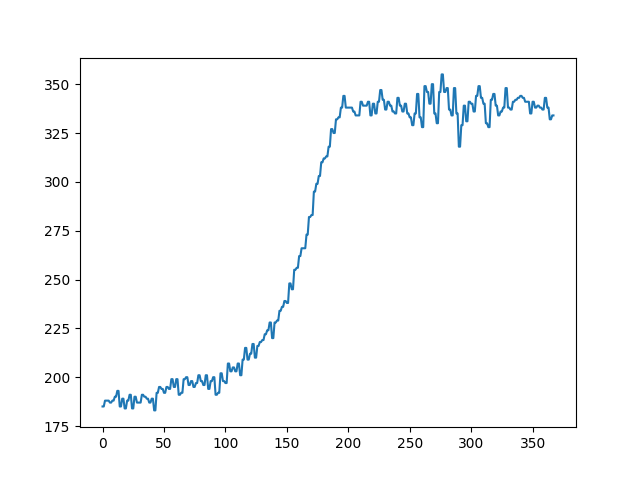

<IPython.core.display.Javascript object>


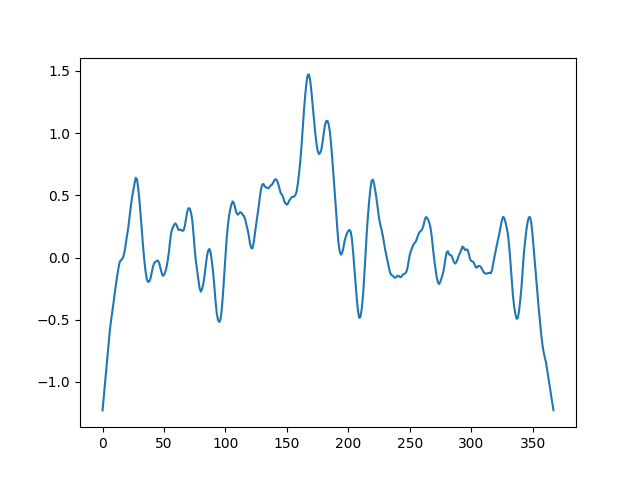

<IPython.core.display.Javascript object>


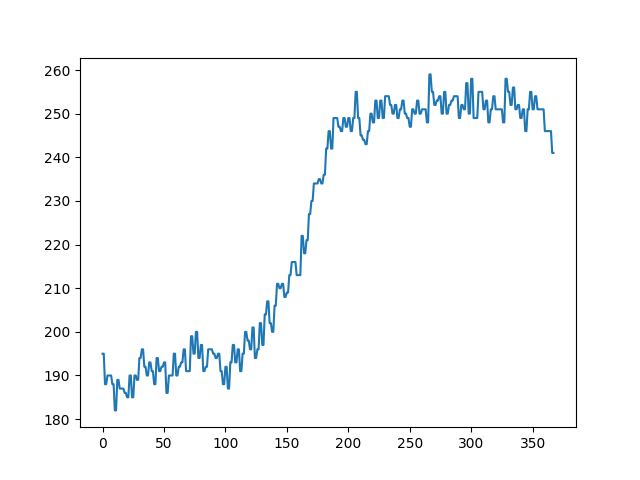

<IPython.core.display.Javascript object>


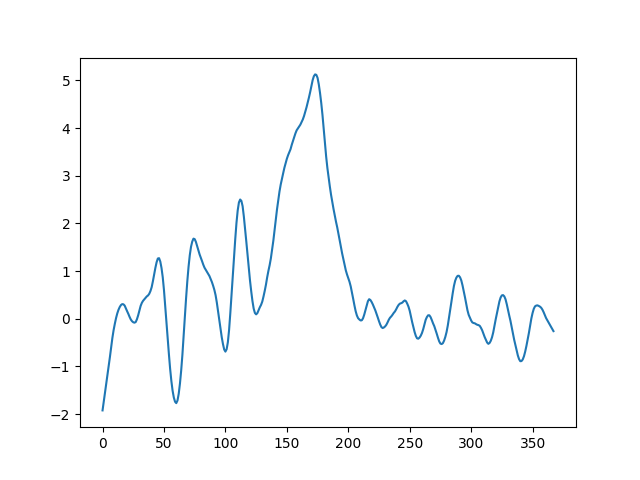

<IPython.core.display.Javascript object>


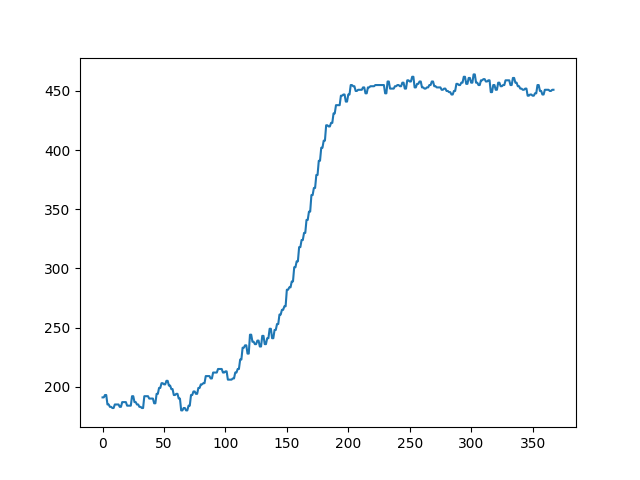

<IPython.core.display.Javascript object>


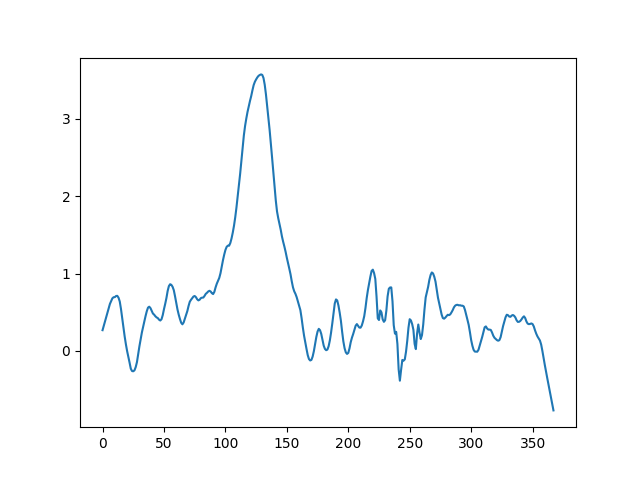

<IPython.core.display.Javascript object>


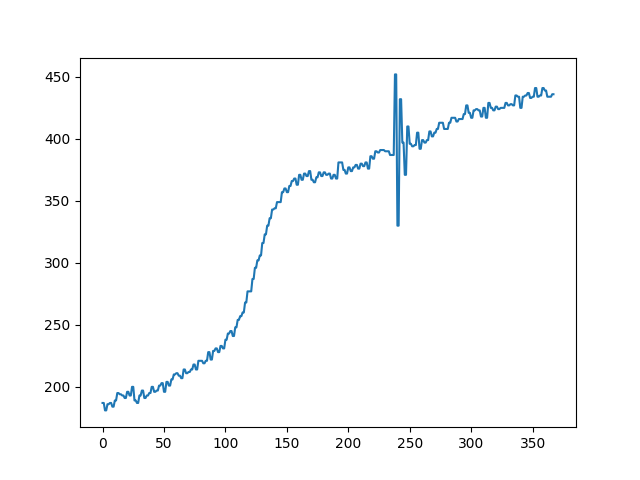

<IPython.core.display.Javascript object>


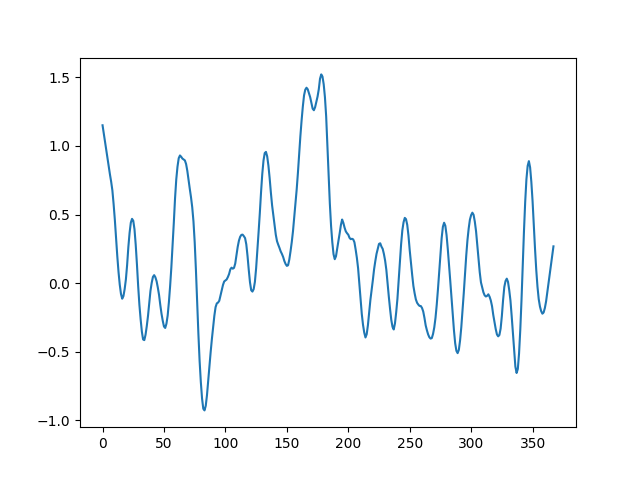

<IPython.core.display.Javascript object>


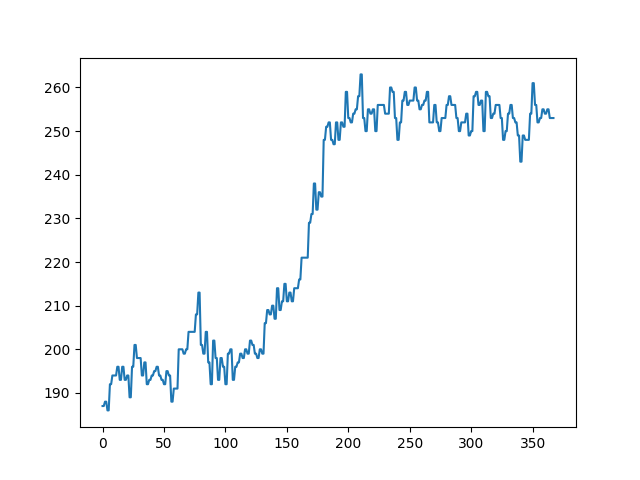

/tmp/ipykernel_2852/3860897745.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


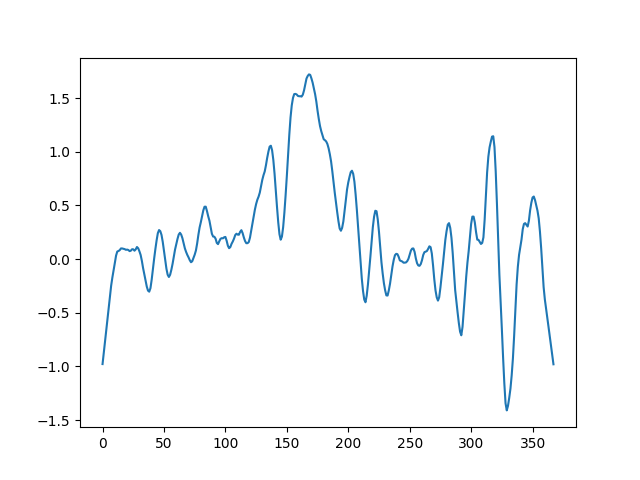

<IPython.core.display.Javascript object>


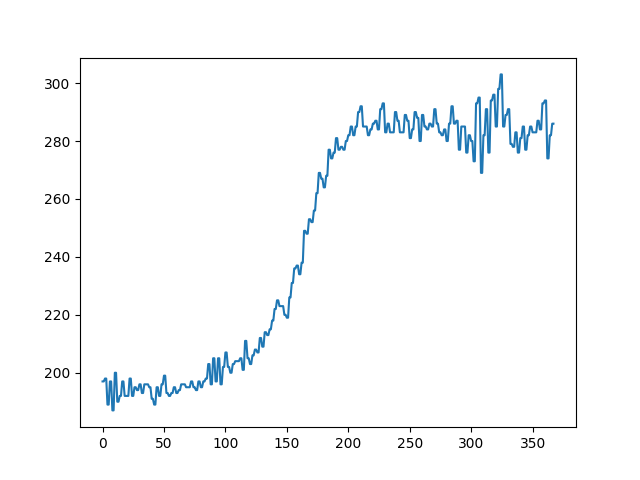

<IPython.core.display.Javascript object>


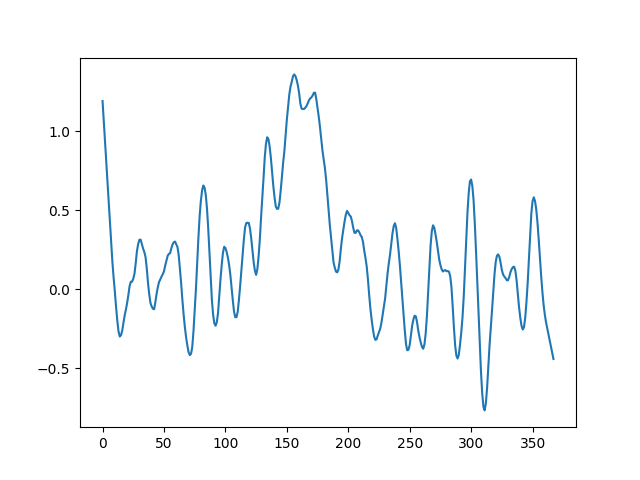

<IPython.core.display.Javascript object>


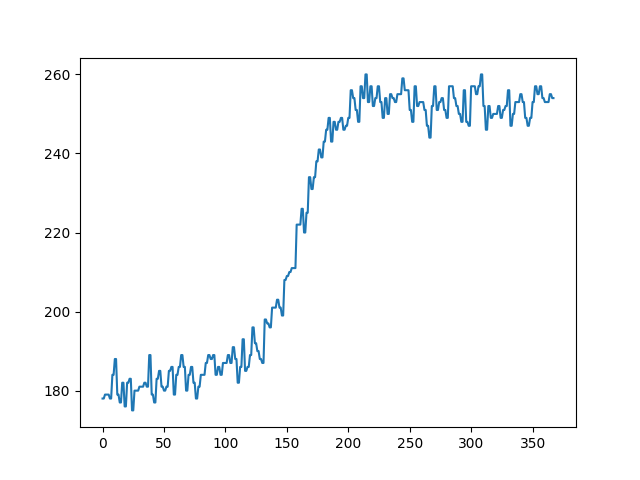

<IPython.core.display.Javascript object>


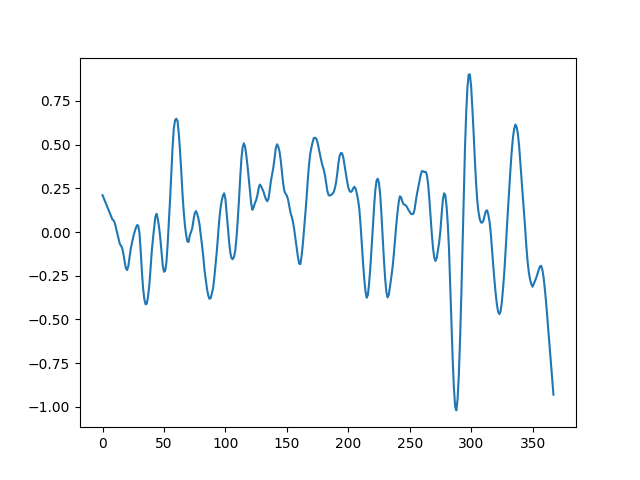

<IPython.core.display.Javascript object>


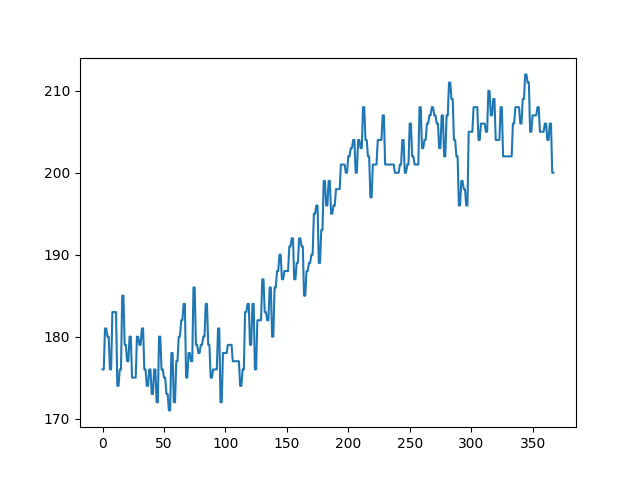

<IPython.core.display.Javascript object>


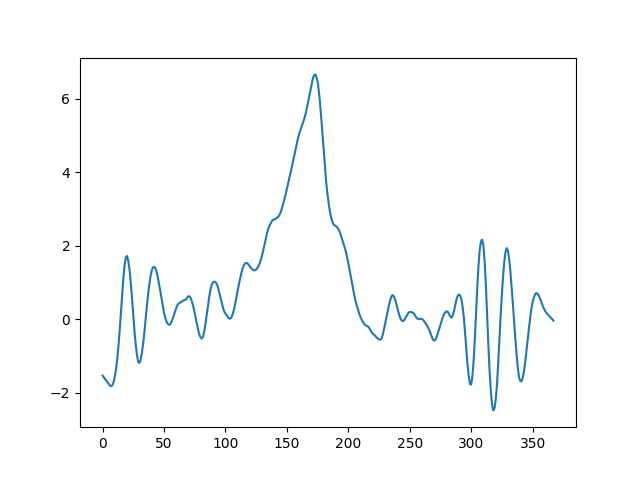

<IPython.core.display.Javascript object>


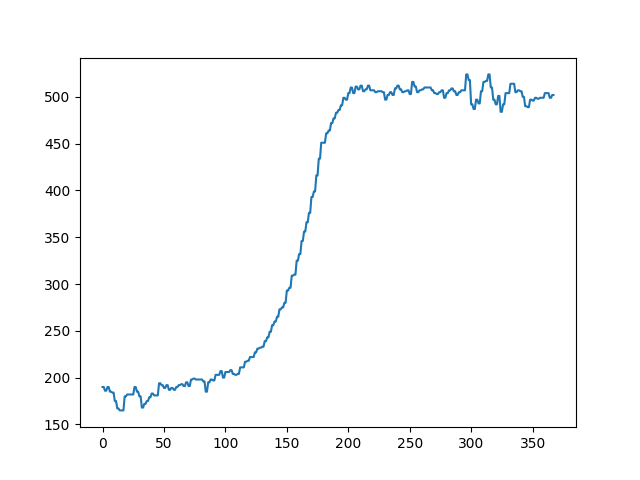

<IPython.core.display.Javascript object>


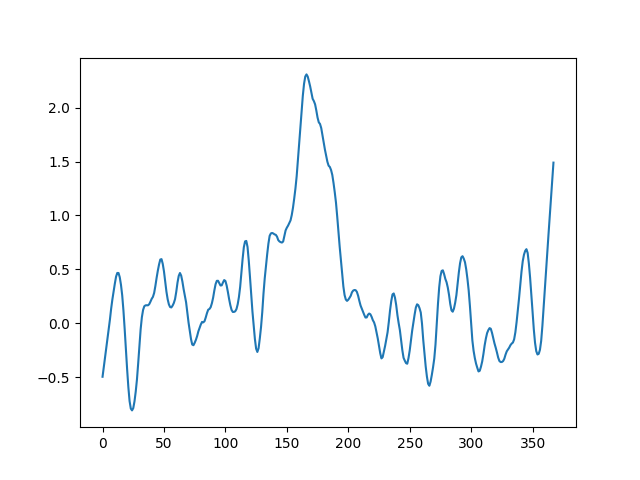

<IPython.core.display.Javascript object>


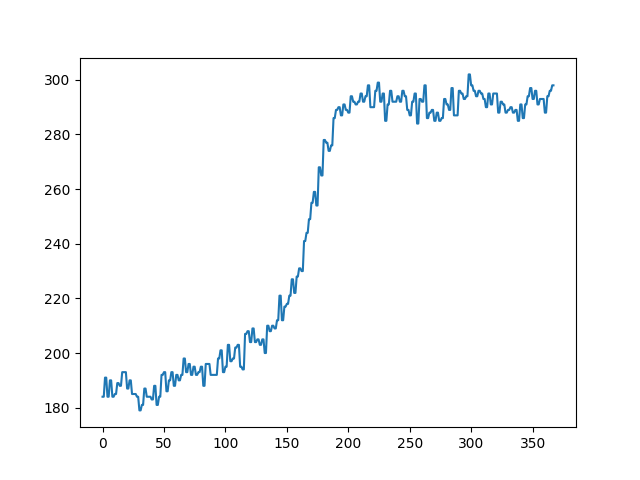

<IPython.core.display.Javascript object>


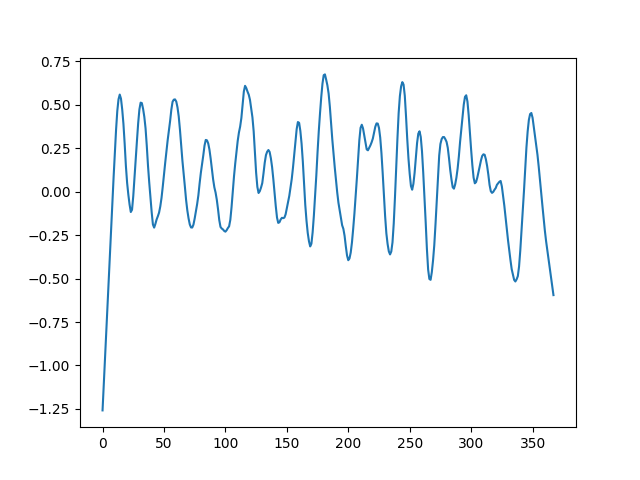

<IPython.core.display.Javascript object>


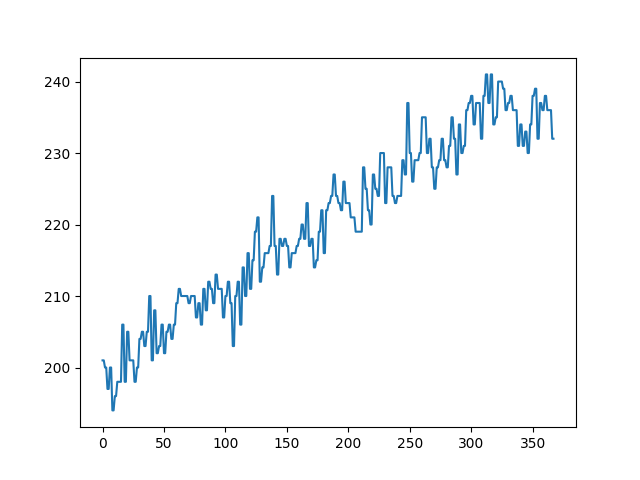

In [13]:
n=coll.subset('n_peaks',3,20).get_indexes()
c=0
print(len(n)/coll.n_trace)
for i in n:
    if(c>10): continue
    plt.figure()
    plt.plot(coll.get_curr()[i])
    plt.figure()
    plt.plot(coll.get_traces()[i])
    plt.show()
    c+=1
    
    